In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

In [23]:
import os

csv_dir = '/simurgh/u/akhatua/moderation_protocol/logs_deal_no_deal/good_shady'
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

total_points = np.zeros((len(csv_files), 3, 2, 5))
min_points = np.zeros((len(csv_files), 3, 2, 5))

for idx, csv_file in tqdm(enumerate(csv_files)):
    df = pd.read_csv(os.path.join(csv_dir, csv_file))
    conversation_rounds = int(csv_file.split('_')[2])
    seed = int(csv_file.split('_')[4].split('.')[0])
    include_moderator = int(csv_file.split('_')[3] == 'True')
    last_row = df[['points_A', 'points_B']].iloc[-1]
    
    last_row['total_points'] = last_row['points_A'] + last_row['points_B']
    # print(last_row['total_points'])
    last_row['min_points'] = min(last_row['points_A'], last_row['points_B'])
    # print(last_row)
    total_points[idx][(conversation_rounds-3)//2][include_moderator][seed] = last_row['total_points']
    min_points[idx][(conversation_rounds-3)//2][include_moderator][seed] = last_row['min_points']

882it [00:04, 203.78it/s]


In [27]:
total_points.shape

(882, 3, 2, 5)

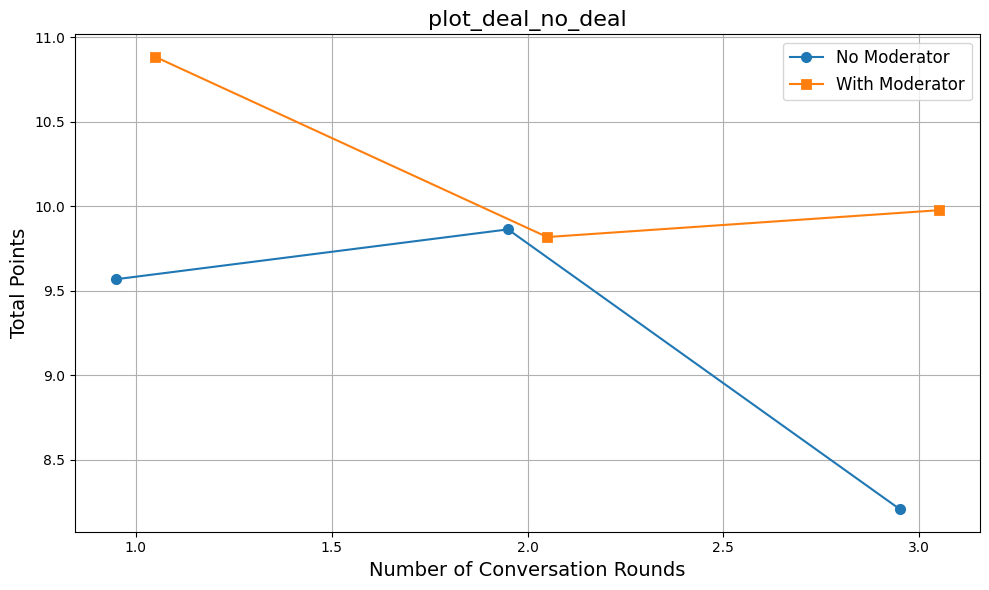

In [36]:
colors = ['#1f77b4', '#ff7f0e']
styles = ['o-', 's-']

offset = 0.1  # small offset to avoid overlapping

plt.figure(figsize=(10, 6))

for idx, label in enumerate(['No Moderator', 'With Moderator']):
    # Calculate means and standard deviations
    means = 100*min_points.mean(axis=(0, -1))[:, idx]
    std_devs = 100*min_points.std(axis=(0, -1))[:, idx]
    
    # Create x-coordinates with slight offset to avoid overlap
    x_coords = np.arange(1, len(means)+1) + (idx - 0.5) * offset
    
    # Plot means with error bars
    plt.errorbar(
        x=x_coords,
        y=means,
        # yerr=std_devs,
        label=label,
        fmt=styles[idx],
        color=colors[idx],
        capsize=5,
        ecolor='gray',
        elinewidth=2,
        markeredgewidth=2,
    )

plt.title("plot_deal_no_deal", fontsize=16)
plt.xlabel('Number of Conversation Rounds', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


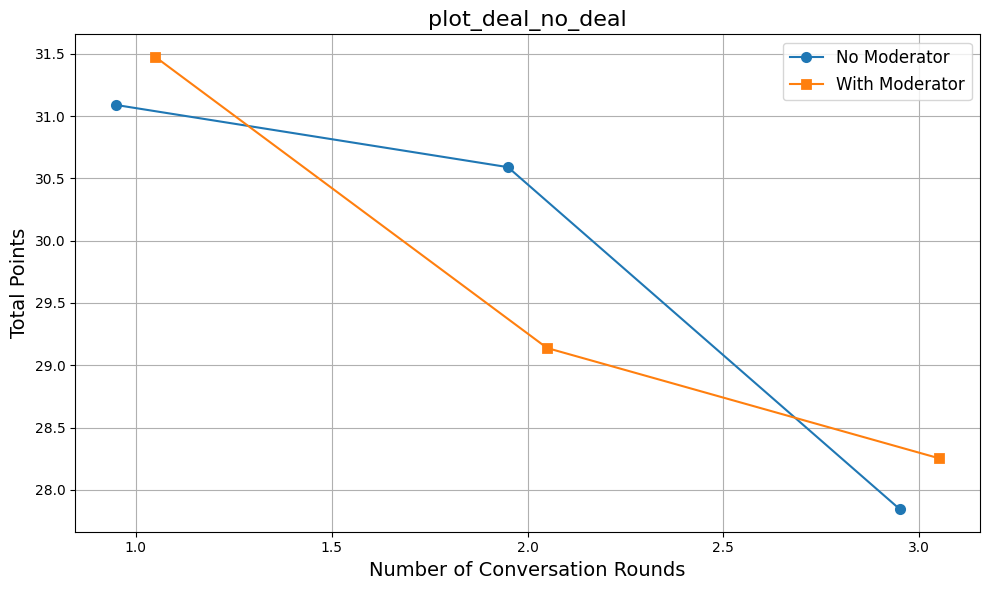

In [37]:
colors = ['#1f77b4', '#ff7f0e']
styles = ['o-', 's-']

offset = 0.1  # small offset to avoid overlapping

plt.figure(figsize=(10, 6))

for idx, label in enumerate(['No Moderator', 'With Moderator']):
    # Calculate means and standard deviations
    means = 100*total_points.mean(axis=(0, -1))[:, idx]
    std_devs = 100*total_points.std(axis=(0, -1))[:, idx]
    
    # Create x-coordinates with slight offset to avoid overlap
    x_coords = np.arange(1, len(means)+1) + (idx - 0.5) * offset
    
    # Plot means with error bars
    plt.errorbar(
        x=x_coords,
        y=means,
        # yerr=std_devs,
        label=label,
        fmt=styles[idx],
        color=colors[idx],
        capsize=5,
        ecolor='gray',
        elinewidth=2,
        markeredgewidth=2,
    )

plt.title("plot_deal_no_deal", fontsize=16)
plt.xlabel('Number of Conversation Rounds', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
import os

csv_dir = '/simurgh/u/akhatua/moderation_protocol/logs_deal_no_deal/good'
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

total_points = np.zeros((len(csv_files), 10, 2, 5))
min_points = np.zeros((len(csv_files), 10, 2, 5))

for idx, csv_file in tqdm(enumerate(csv_files)):
    df = pd.read_csv(os.path.join(csv_dir, csv_file))
    conversation_rounds = int(csv_file.split('_')[2])
    seed = int(csv_file.split('_')[4].split('.')[0])
    include_moderator = int(csv_file.split('_')[3] == 'True')
    last_row = df[['points_A', 'points_B']].iloc[-1]
    
    last_row['total_points'] = last_row['points_A'] + last_row['points_B']
    # print(last_row['total_points'])
    last_row['min_points'] = min(last_row['points_A'], last_row['points_B'])
    # print(last_row)
    total_points[idx][(conversation_rounds-3)//2][include_moderator][seed] = last_row['total_points']
    min_points[idx][(conversation_rounds-3)//2][include_moderator][seed] = last_row['min_points']

36it [00:00, 141.29it/s]


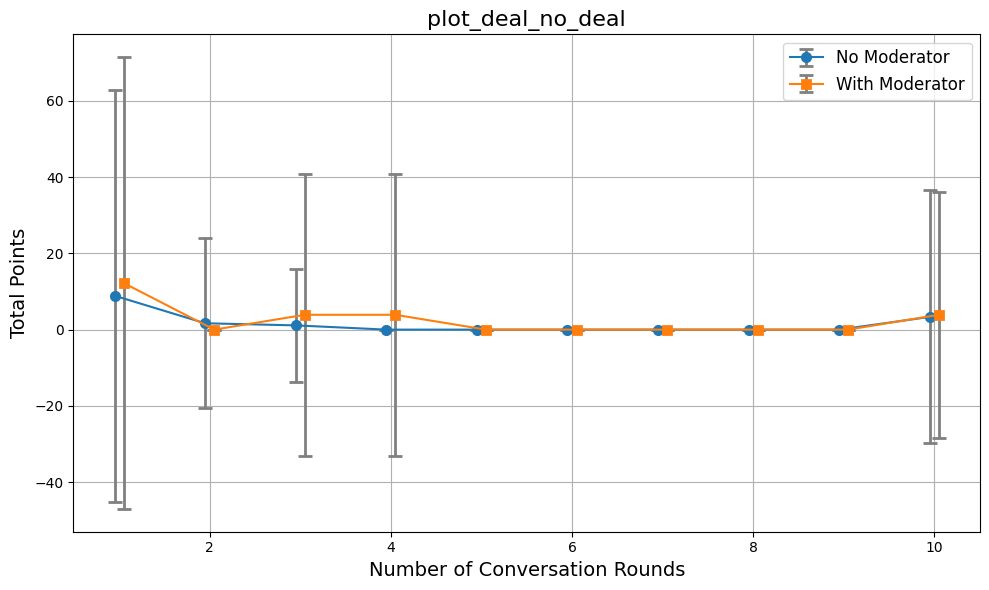

In [43]:
colors = ['#1f77b4', '#ff7f0e']
styles = ['o-', 's-']

offset = 0.1  # small offset to avoid overlapping

plt.figure(figsize=(10, 6))

for idx, label in enumerate(['No Moderator', 'With Moderator']):
    # Calculate means and standard deviations
    means = 100*min_points.mean(axis=(0, -1))[:, idx]
    std_devs = 100*min_points.std(axis=(0, -1))[:, idx]
    
    # Create x-coordinates with slight offset to avoid overlap
    x_coords = np.arange(1, len(means)+1) + (idx - 0.5) * offset
    
    # Plot means with error bars
    plt.errorbar(
        x=x_coords,
        y=means,
        yerr=std_devs,
        label=label,
        fmt=styles[idx],
        color=colors[idx],
        capsize=5,
        ecolor='gray',
        elinewidth=2,
        markeredgewidth=2,
    )

plt.title("plot_deal_no_deal", fontsize=16)
plt.xlabel('Number of Conversation Rounds', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


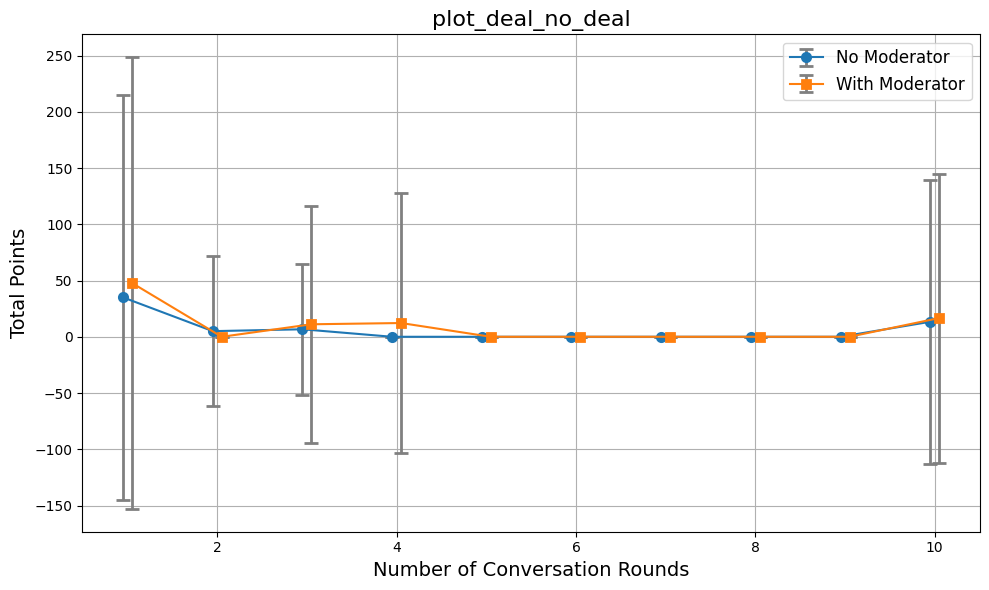

In [44]:
colors = ['#1f77b4', '#ff7f0e']
styles = ['o-', 's-']

offset = 0.1  # small offset to avoid overlapping

plt.figure(figsize=(10, 6))

for idx, label in enumerate(['No Moderator', 'With Moderator']):
    # Calculate means and standard deviations
    means = 100*total_points.mean(axis=(0, -1))[:, idx]
    std_devs = 100*total_points.std(axis=(0, -1))[:, idx]
    
    # Create x-coordinates with slight offset to avoid overlap
    x_coords = np.arange(1, len(means)+1) + (idx - 0.5) * offset
    
    # Plot means with error bars
    plt.errorbar(
        x=x_coords,
        y=means,
        yerr=std_devs,
        label=label,
        fmt=styles[idx],
        color=colors[idx],
        capsize=5,
        ecolor='gray',
        elinewidth=2,
        markeredgewidth=2,
    )

plt.title("plot_deal_no_deal", fontsize=16)
plt.xlabel('Number of Conversation Rounds', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



In [46]:
import os

# Directory containing the CSV files
csv_dir = '/simurgh/u/akhatua/moderation_protocol/logs_deal_no_deal/good_shady'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Initialize counters
true_count = 0
false_count = 0

# Count files based on "True" and "False" in their names
for file in csv_files:
    if 'True' in file:
        true_count += 1
    elif 'False' in file:
        false_count += 1

# Output the counts
print(f"Number of files with 'True': {true_count}")
print(f"Number of files with 'False': {false_count}")

Number of files with 'True': 430
Number of files with 'False': 452
